# Disclaimer:
- Not financial advice
- Momentum strategy is very much an incomplete strategy and should be used with other indicators. Purely using this strategy, like other strategies, can make you lose a lot of money
- I will be going over the various ways on how to identify momentum.

# Momentum Trading Signals
- This is a Strategy that seeks to capitalize on trends as it is picking up steam
- Extremely risky
- Primarily takes into consideration price and volume information (but can also have multi-faceted attributes that you take into consideration)
- Momentum can occur when a security is either rapidly falling *down* or *up*
- Point of entry and exit can occur within a day or even a few days (maybe weeks)

# Basic Idea
This is not very scientific at all, but I hope to break down some thoughts on this subject. This "strategy" pretty much follows the saying:
- "Buy High, sell Higher"

# Objective:
### Combining all the popular identifications for momentum
- Rate of change (ROC)
    - Percentage change of closing prices
    - Closing prices with significant difference between timestamps
- Stochasitc Oscillator
- Relative Strength Index (RSI)
- Moving Average Convergence Divergence (MACD)

### Similarly, if you have not seen the video I did on Pairs Trading, please check out the [link here](https://www.youtube.com/watch?v=f73ItMWO4z8&t=627s); The link is also in the video description.

<img src="Pairs.png" alt="drawing" width="500"/>

<!-- ![Pairs Trading Image](./Pairs.png) -->

# Let's Get Some Data

In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2021, 11, 13), end=datetime(2022, 11, 13)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["GME","AMC", "BBBY"] 
data = get_historical_Data(ticks)
print(data.shape)
# Most Recent Data
data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(251, 3)


,GME,AMC,BBBY
Date,,,
2022-11-07,25.760000,5.33,3.95
2022-11-08,25.139999,5.62,4.00
2022-11-09,23.110001,5.19,3.54
2022-11-10,24.879999,6.13,3.88
2022-11-11,26.100000,7.20,3.95


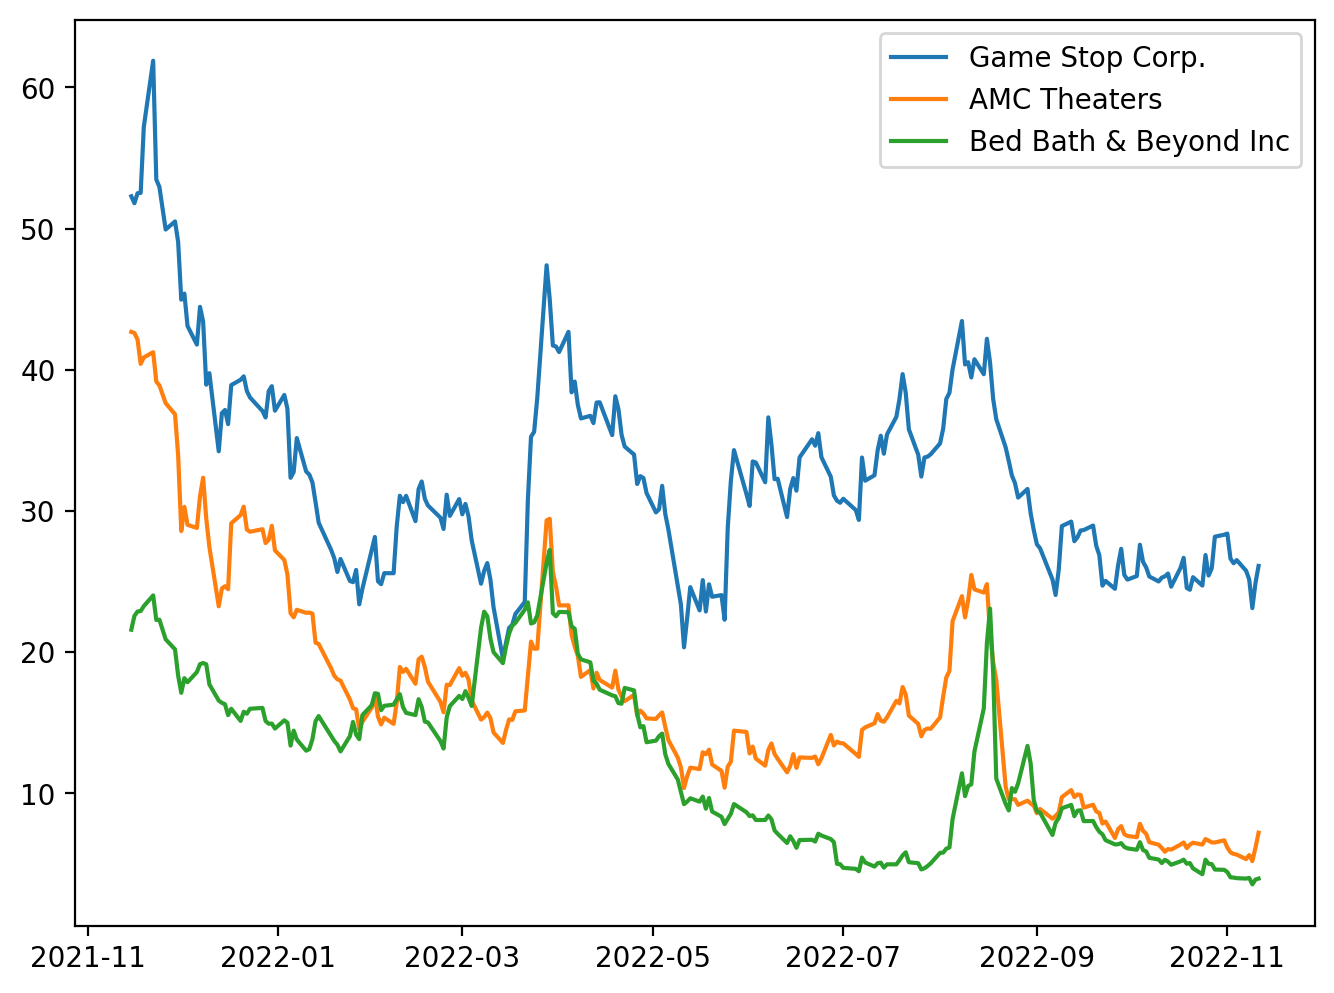

In [2]:
# What do these meme stocks look like?
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
GME = data['GME']
AMC = data['AMC']
BBBY = data['BBBY']

plt.plot(GME, label = "Game Stop Corp.")
plt.plot(AMC, label = "AMC Theaters")
plt.plot(BBBY, label = "Bed Bath & Beyond Inc")
plt.legend()

### I pulled together 3 meme stocks that represent a great example on what momentum can do
- As we can see, there are some quite noticeable spikes in the 2021 era

## Some questions I hope to find more about
- Let's figure out how we know we are in a trend? 
- Can we spot the trend before it reflects on the market?
- Could this just be a phenomenon?

# A popular momentum indicator is:
# Rate of Change
- Speed of which a variable changes over a specific period of time (in this case day-to-day)
- High rate of change -> indicator to buy
- Low rate of change -> indicator to sell

In [3]:
# Let's see how extreme these price changes can be.

d = data.pct_change()[1:] # Converting to get percentage changes.
GME = d['GME']
GME.values, GME.mean()

(array([-0.00937174,  0.01361139,  0.00057141,  0.08890162,  0.0819493 ,
        -0.13593217, -0.00991115, -0.05694588,  0.01146602, -0.02871139,
        -0.08343107,  0.00956406, -0.05050671, -0.03057024,  0.06396603,
        -0.02339578, -0.10302332,  0.02086543, -0.13917358,  0.07897426,
         0.0060938 , -0.02691971,  0.07642301,  0.00963763,  0.00623645,
        -0.02605613, -0.01207793, -0.02517419, -0.01247381,  0.05100359,
         0.0090951 , -0.04467909,  0.02998852, -0.02571312, -0.13122025,
         0.01283144,  0.07318932, -0.06734463, -0.00648106, -0.01719114,
        -0.04357328, -0.04759962, -0.06635232, -0.02148567, -0.03659568,
         0.03594042, -0.0583866 , -0.00359461,  0.03477304, -0.09432506,
         0.04694191,  0.11255231,  0.03369134, -0.11154527, -0.00809674,
         0.03134126,  0.        ,  0.12956813,  0.07517303, -0.01464317,
         0.01453416, -0.05762578,  0.07746185,  0.01720037, -0.03833864,
        -0.01523381, -0.02855263, -0.02702012,  0.0

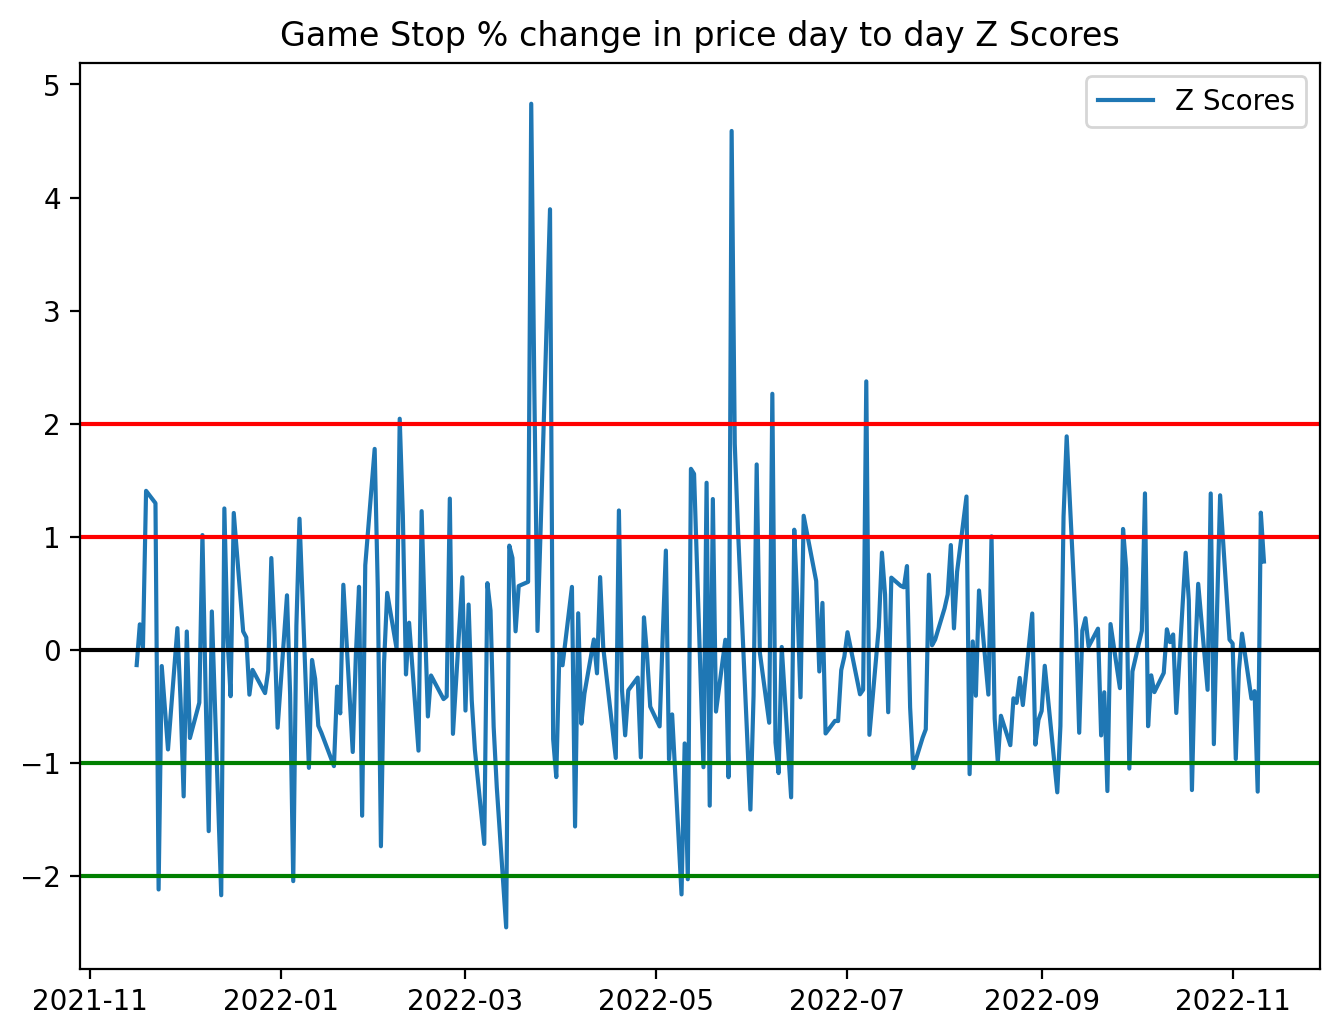

In [4]:
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (GME - GME.mean())/GME.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(2.0, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-2.0, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Game Stop % change in price day to day Z Scores')
plt.show()

### We can obviously tell if when there was a spike in price (not even considering the percentage changes)
- So, what are some indicators that can tell us when a spike **could** occur?

## Another avenue to identify momentum is to subtract closing prices X days apart 
## Momentum can be [defined](https://www.investopedia.com/articles/technical/081501.asp#:~:text=Market%20momentum%20is%20measured%20by,plotted%20around%20a%20zero%20line.) as 
- V - V<sub>x</sub>

where:\
V = Latest Price\
V<sub>x</sub> = Closing Price\
x = Number of days ago

In [5]:
data

,GME,AMC,BBBY
Date,,,
2021-11-15,52.285000,42.680000,21.580000
2021-11-16,51.794998,42.599998,22.559999
2021-11-17,52.500000,42.130001,22.870001
2021-11-18,52.529999,40.410000,22.900000
2021-11-19,57.200001,40.869999,23.250000
...,...,...,...
2022-11-07,25.760000,5.330000,3.950000
2022-11-08,25.139999,5.620000,4.000000
2022-11-09,23.110001,5.190000,3.540000


In [6]:
"""
Measures momentum by subtracting the current day + head - current day final price
We can easily do this by using the diff() on dataframes
    """
data_mi = data.diff(10) # where 10 is the number of days ahead I will use as the final price
data_mi

,GME,AMC,BBBY
Date,,,
2021-11-15,NaN,NaN,NaN
2021-11-16,NaN,NaN,NaN
2021-11-17,NaN,NaN,NaN
2021-11-18,NaN,NaN,NaN
2021-11-19,NaN,NaN,NaN
...,...,...,...
2022-11-07,1.050001,-1.03,-0.31
2022-11-08,-1.730001,-1.13,-1.29
2022-11-09,-2.309999,-1.45,-1.46


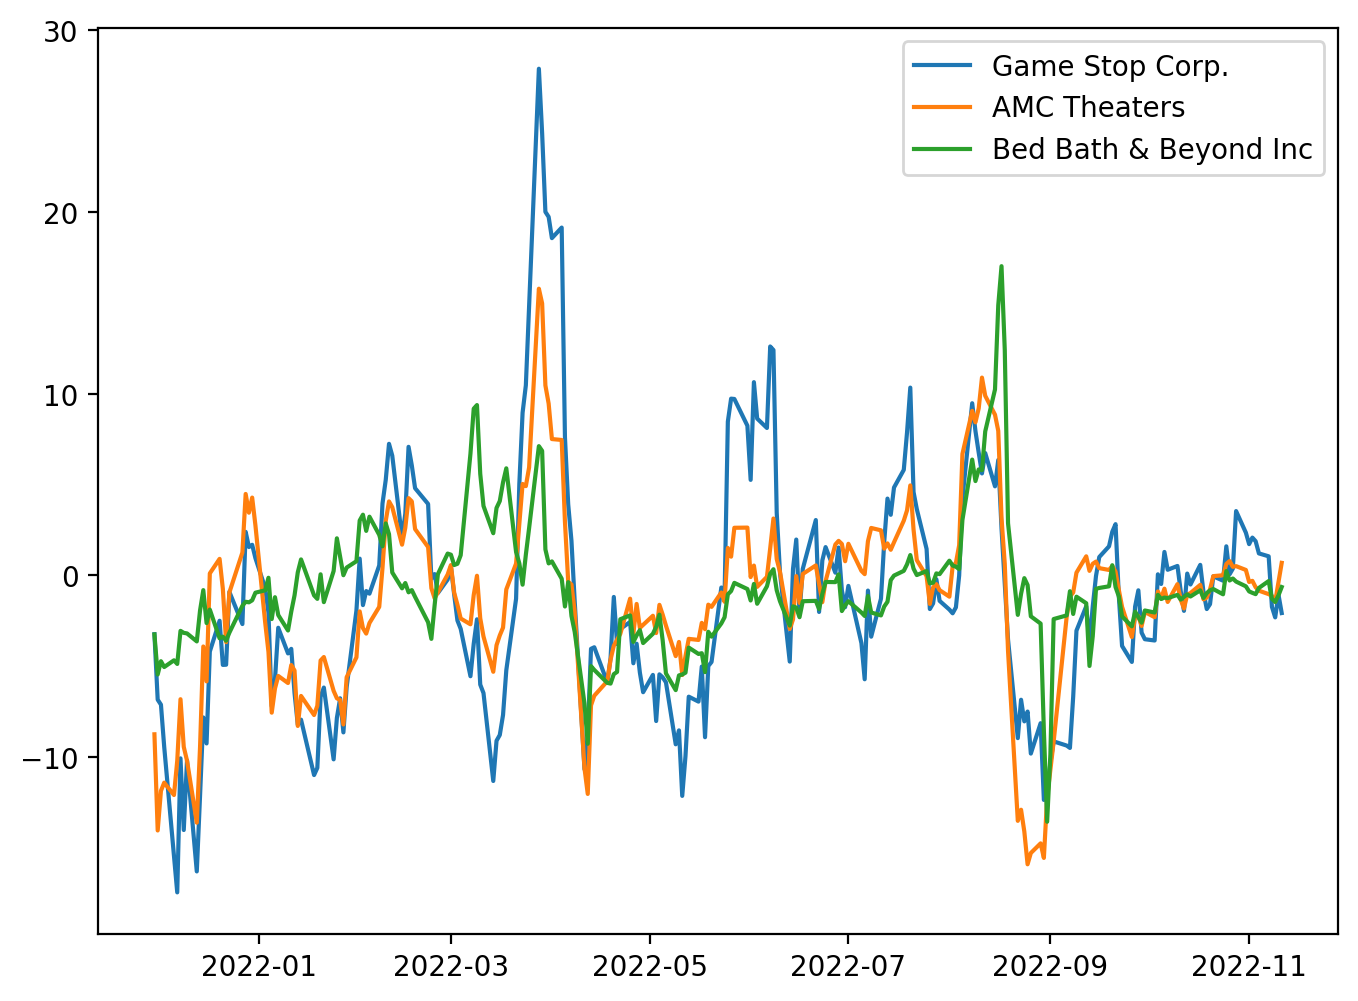

In [7]:
"""You can plot indiviudal features and see how they interact"""
figure(figsize=(8, 6), dpi=200)
GME = data_mi['GME']
AMC = data_mi['AMC']
BBBY = data_mi['BBBY']

plt.plot(GME, label = "Game Stop Corp.")
plt.plot(AMC, label = "AMC Theaters")
plt.plot(BBBY, label = "Bed Bath & Beyond Inc")
plt.legend() 

# Let's look at the notorious Game Stop..

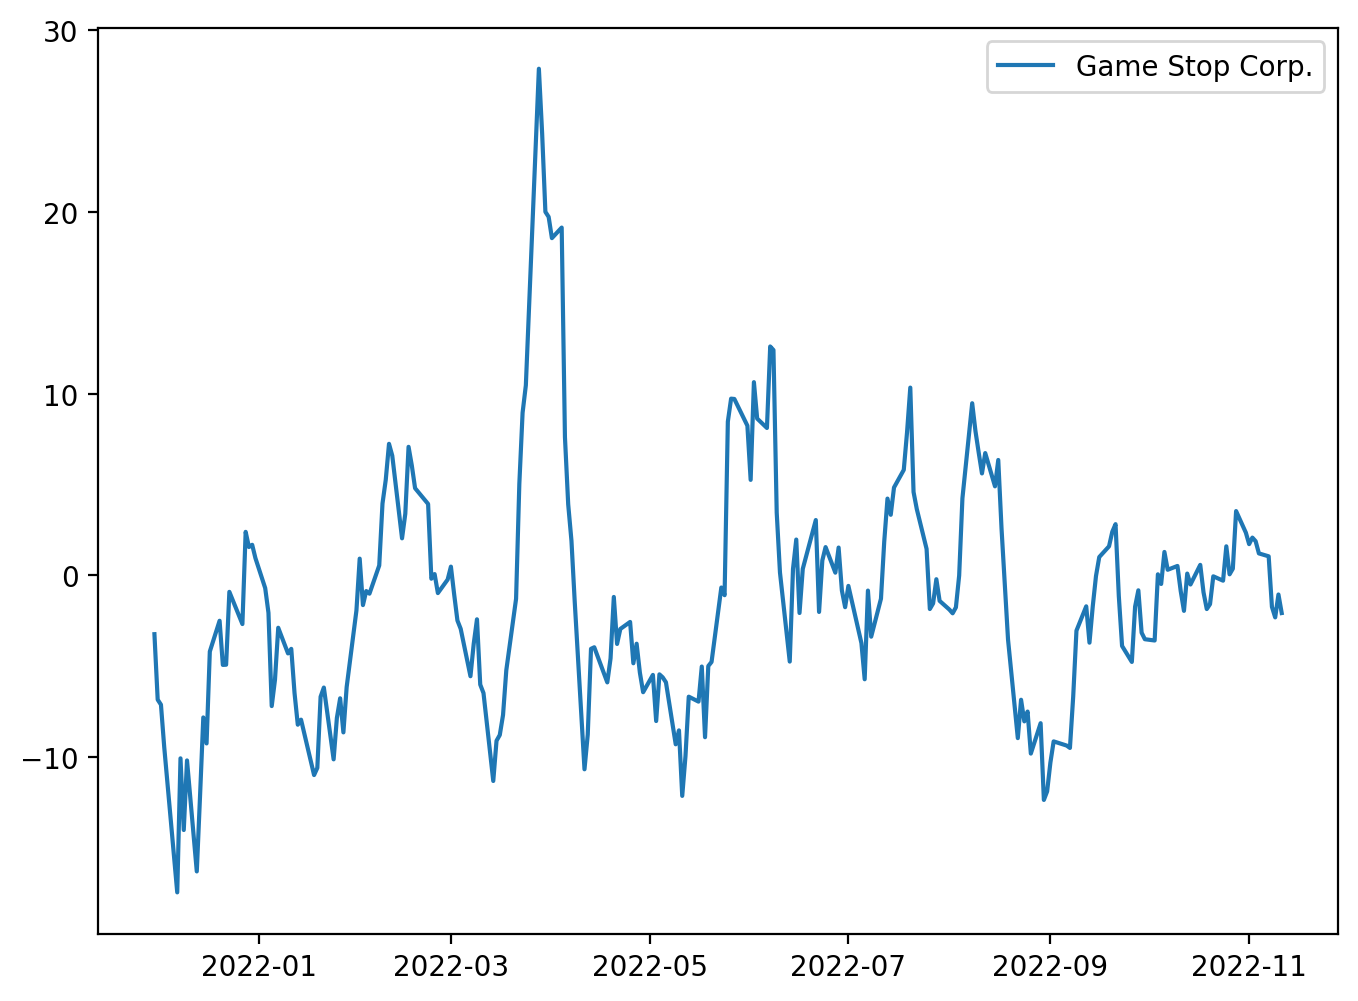

In [8]:
figure(figsize=(8, 6), dpi=200)
GME = data_mi['GME']
# AMC = data_mi['AMC']
# BBBY = data_mi['BBBY']

plt.plot(GME, label = "Game Stop Corp.")
# plt.plot(AMC, label = "AMC Theaters")
# plt.plot(BBBY, label = "Bed Bath & Beyond Inc")
plt.legend() 

# Gist is that anything above the '0' line is considered bullish momentum and anything below the '0' line is bearish momentum

# Stochastic Oscillator Strategy
- This is a momentum indicator that compares closing price of a security to its historical prices in a period of time.
- Generates overbought/oversold indicators.

# [Equations](https://www.investopedia.com/terms/s/stochasticoscillator.asp)
- %K = The current value of Stochastic indicator: also known as the "fast" stochastic indicator
    - Represents the current price trend in relation to the asset's recent price range
- %D = The 3 period moving average of %K: The "slow" stochastic indicator
    - Used to show the longer term trend for current prices

In [9]:
#                (Most Recent Closing Price – Lowest Traded Price of X previous Sessions)
#  %K = --------------------------------------------------------------------------------------- * (100)
#         (Highest Price of X previous sessions – Lowest Traded Price of X previous Sessions)
# *** X is typically 14 days. ***


# %D = Moving Average of 3 period of %K

In [10]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [11]:
# Our data that we will be using: Apple Stock
ticker = pdr.get_data_yahoo("AAPL", dt.datetime(2021, 10, 29), dt.datetime.now())
ticker

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-29,149.940002,146.410004,147.220001,149.800003,124953200.0,148.718567
2021-11-01,149.699997,147.800003,148.990005,148.960007,74588300.0,147.884644
2021-11-02,151.570007,148.649994,148.660004,150.020004,69122000.0,148.936981
2021-11-03,151.970001,149.820007,150.389999,151.490005,54511500.0,150.396362
2021-11-04,152.429993,150.639999,151.580002,150.960007,60394600.0,149.870178
...,...,...,...,...,...,...
2022-11-07,139.149994,135.669998,137.110001,138.919998,83374600.0,138.919998
2022-11-08,141.429993,137.490005,140.410004,139.500000,89908500.0,139.500000
2022-11-09,138.550003,134.589996,138.500000,134.869995,74917800.0,134.869995


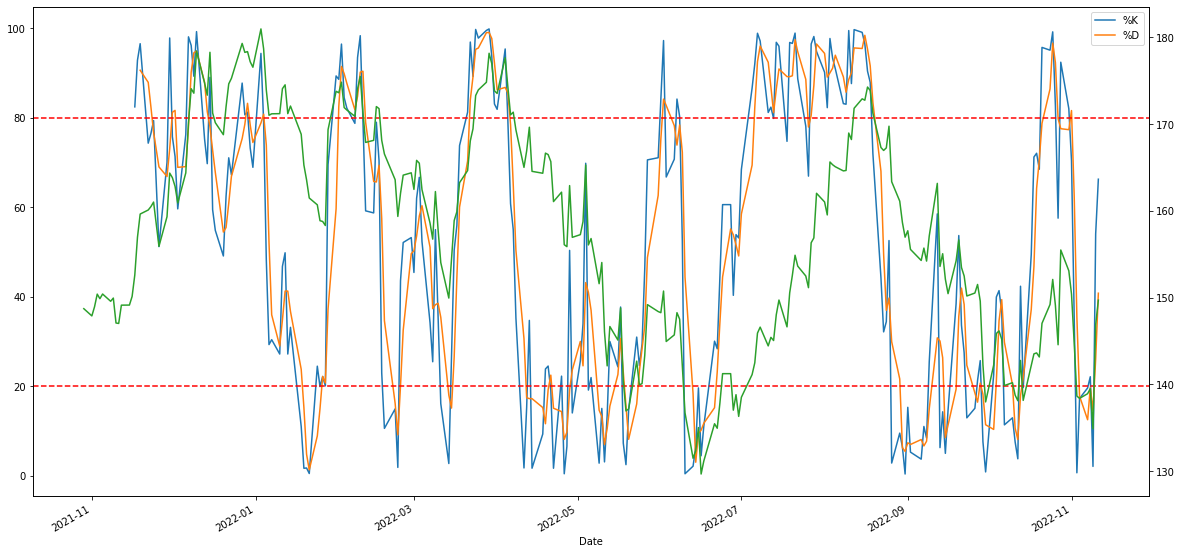

'Remember, that these signals are indicators not predictors. If we look at the graph, there are a ton of signals related to \nbuy and sell, so you have to have other factors to have a more reliable approach of when to buy and sell.'

In [12]:
# https://www.learnpythonwithrune.org/pandas-calculate-the-stochastic-oscillator-indicator-for-stocks/

# %D = Simple Moving Average of %K
ticker['14-high'] = ticker['High'].rolling(14).max()
ticker['14-low'] = ticker['Low'].rolling(14).min()
ticker['%K'] = (ticker['Close'] - ticker['14-low'])*100/(ticker['14-high'] - ticker['14-low'])
ticker['%D'] = ticker['%K'].rolling(3).mean()
ax = ticker[['%K', '%D']].plot()
ticker['Adj Close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

# if %K > %D, then that is a buy signal.
# if %K < %D, then that is a sell signal.

# Traditionally:
# Below 20 indicates that equity is oversold
# Abovae 80 indicates that equity is overbought

# Note that it is not always accurate as seen in the graph.

"""Remember, that these signals are indicators not predictors. If we look at the graph, there are a ton of signals related to 
buy and sell, so you have to have other factors to have a more reliable approach of when to buy and sell."""

# Relative Strength Index (RSI)
- This is a momentum indicator used in technical analysis.
    - Details an overvalued or undervalued condition in the price of a security.
- A RSI reading > 70 indicates an overbought condition (time to sell)
- A RSI reading < 30 indicates an oversold condition (time to buy)

# RSI Equation

RSI<sub>1</sub> = 100 - \[$\dfrac{100}{1+\dfrac{Average Gain}{Average Loss}}$\]

- Average gain or loss 

In [13]:
import pandas_ta as pta

In [14]:
# Calculations for the function "rsi"
# link here: https://github.com/twopirllc/pandas-ta/blob/main/pandas_ta/momentum/rsi.py
ticker["rsi"] = pta.rsi(ticker['Adj Close'], length = 14)

In [15]:
ticker

,High,Low,Open,Close,Volume,Adj Close,14-high,14-low,%K,%D,rsi
Date,,,,,,,,,,,
2021-10-29,149.940002,146.410004,147.220001,149.800003,124953200.0,148.718567,NaN,NaN,NaN,NaN,NaN
2021-11-01,149.699997,147.800003,148.990005,148.960007,74588300.0,147.884644,NaN,NaN,NaN,NaN,NaN
2021-11-02,151.570007,148.649994,148.660004,150.020004,69122000.0,148.936981,NaN,NaN,NaN,NaN,NaN
2021-11-03,151.970001,149.820007,150.389999,151.490005,54511500.0,150.396362,NaN,NaN,NaN,NaN,NaN
2021-11-04,152.429993,150.639999,151.580002,150.960007,60394600.0,149.870178,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07,139.149994,135.669998,137.110001,138.919998,83374600.0,138.919998,157.5,134.380005,19.636653,12.543685,41.301851
2022-11-08,141.429993,137.490005,140.410004,139.500000,89908500.0,139.500000,157.5,134.380005,22.145312,19.694336,42.133239
2022-11-09,138.550003,134.589996,138.500000,134.869995,74917800.0,134.869995,157.5,134.380005,2.119335,14.633767,37.559833


# Key takeaways from RSI
- RSI > 70 -> Overbought (Which means its and indicator to sell)
- RSI < 30 -> Oversold (Which means its an indicator to buy)

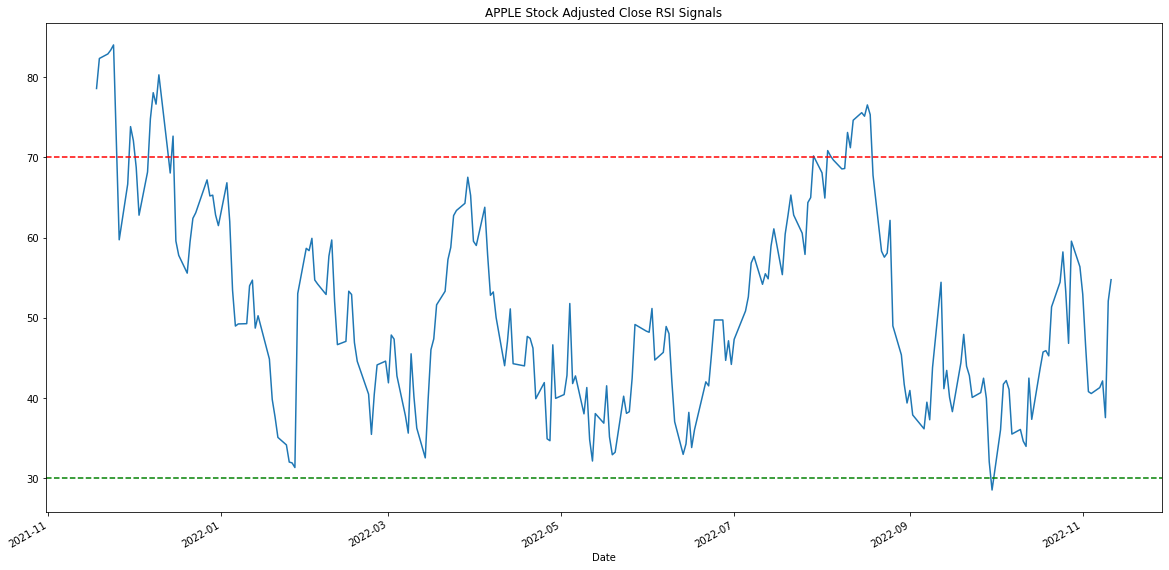

In [16]:
ticker['rsi'].plot(x="Date", y = ["rsi"])
plt.title("APPLE Stock Adjusted Close RSI Signals")
plt.axhline(30, linestyle='--', color="g")
plt.axhline(70, linestyle="--", color="r")
plt.show()

# Moving Average Convergence Divergence (MACD)
- Probably the most popular technical indicator to generate signals
- Another momentum indicator that signals shifts in market momentum
- Calculated by subtracting the 26 period EMA from the 12-period EMA
    - [(EMA) Exponential Moving Averages](https://www.investopedia.com/terms/e/ema.asp): Think of the EMA as a weighted average where the weighting is toward the more recent observations.

<img src="smoothing.png" alt="drawing" width="500"/>
    
    
# 3 Main Components
- MACD Line: (26 Period EMA - 12 Period EMA)
- Signal Line: 9 Period EMA of MACD values (From MACD line)
- Histogram line: MACD line - Signal Line

# We'll use the stockstats package in python that already has the logic

In [17]:
from stockstats import wrap
# Has a host of financial indicators! Github located here: https://github.com/jealous/stockstats

In [21]:
ticker = pdr.get_data_yahoo("GME", dt.datetime(2021, 10, 29), dt.datetime.now())
ticker

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-29,46.437500,44.500000,45.702499,45.877499,9176000.0,45.877499
2021-11-01,52.142502,45.512501,45.632500,50.022499,19776800.0,50.022499
2021-11-02,52.985001,47.922501,49.837502,51.747501,15529200.0,51.747501
2021-11-03,63.922501,52.062500,53.500000,54.582500,45062400.0,54.582500
2021-11-04,57.242500,52.887501,55.500000,54.459999,11632000.0,54.459999
...,...,...,...,...,...,...
2022-11-07,26.299999,24.799999,26.250000,25.760000,3303600.0,25.760000
2022-11-08,25.850000,24.110001,25.330000,25.139999,4695100.0,25.139999
2022-11-09,24.670000,21.889999,24.549999,23.110001,8464800.0,23.110001


In [22]:
type(ticker)

pandas.core.frame.DataFrame

In [23]:
# Note, that dataframe "ticker" takes for granted that data is sorted and contains date, close, high, low, volume features
GME = wrap(ticker) 
GME

,high,low,open,close,volume,adj close
Date,,,,,,
2021-10-29,46.437500,44.500000,45.702499,45.877499,9176000.0,45.877499
2021-11-01,52.142502,45.512501,45.632500,50.022499,19776800.0,50.022499
2021-11-02,52.985001,47.922501,49.837502,51.747501,15529200.0,51.747501
2021-11-03,63.922501,52.062500,53.500000,54.582500,45062400.0,54.582500
2021-11-04,57.242500,52.887501,55.500000,54.459999,11632000.0,54.459999
...,...,...,...,...,...,...
2022-11-07,26.299999,24.799999,26.250000,25.760000,3303600.0,25.760000
2022-11-08,25.850000,24.110001,25.330000,25.139999,4695100.0,25.139999
2022-11-09,24.670000,21.889999,24.549999,23.110001,8464800.0,23.110001


In [24]:
type(GME)

stockstats.StockDataFrame

In [ ]:
# The fields can be adjusted for length of time. Defaults are:
# StockDataFrame.MACD_EMA_LONG = 26
# StockDataFrame.MACD_EMA_SHORT = 12
# StockDataFrame.MACD_EMA_SIGNAL = 9

In [25]:
macd = GME['macd'] # Difference between the two exponential moving averages: MACD =  (26 period EMA - 12 period EMA)
macd

Date
2021-10-29    0.000000
2021-11-01    0.092997
2021-11-02    0.171989
2021-11-03    0.306057
2021-11-04    0.367590
                ...   
2022-11-07   -0.054885
2022-11-08   -0.155859
2022-11-09   -0.395130
2022-11-10   -0.436894
2022-11-11   -0.367314
Name: macd, Length: 262, dtype: float64

In [26]:
macds = GME['macds'] # signal line = EMA of 9 period of the MACD values
macds

Date
2021-10-29    0.000000
2021-11-01    0.051665
2021-11-02    0.100978
2021-11-03    0.170449
2021-11-04    0.229094
                ...   
2022-11-07   -0.193778
2022-11-08   -0.186194
2022-11-09   -0.227981
2022-11-10   -0.269764
2022-11-11   -0.289274
Name: macds, Length: 262, dtype: float64

In [27]:
macdh = GME['macdh'] # histogram line = MACD - Signal Line
macdh

Date
2021-10-29    0.000000
2021-11-01    0.041332
2021-11-02    0.071011
2021-11-03    0.135608
2021-11-04    0.138496
                ...   
2022-11-07    0.138893
2022-11-08    0.030335
2022-11-09   -0.167149
2022-11-10   -0.167130
2022-11-11   -0.078040
Name: macdh, Length: 262, dtype: float64

In [28]:
def plot_macd(prices, macd, signal, hist):
    """ A great plotting function retrieved from this medium article:
    https://medium.com/codex/algorithmic-trading-with-macd-in-python-1c2769a6ad1b
    """
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (6,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

# Signals
- if MACD line > Signal line (Buy the stock)
- if MACD line < Signal line (Sell the stock)
- Traders use the histogram as a gauge on whether the bullish or bearish momentum is high
- When there is no highlight histogram heights, that may be the moment to enter into the market because it may be the start of a trend.

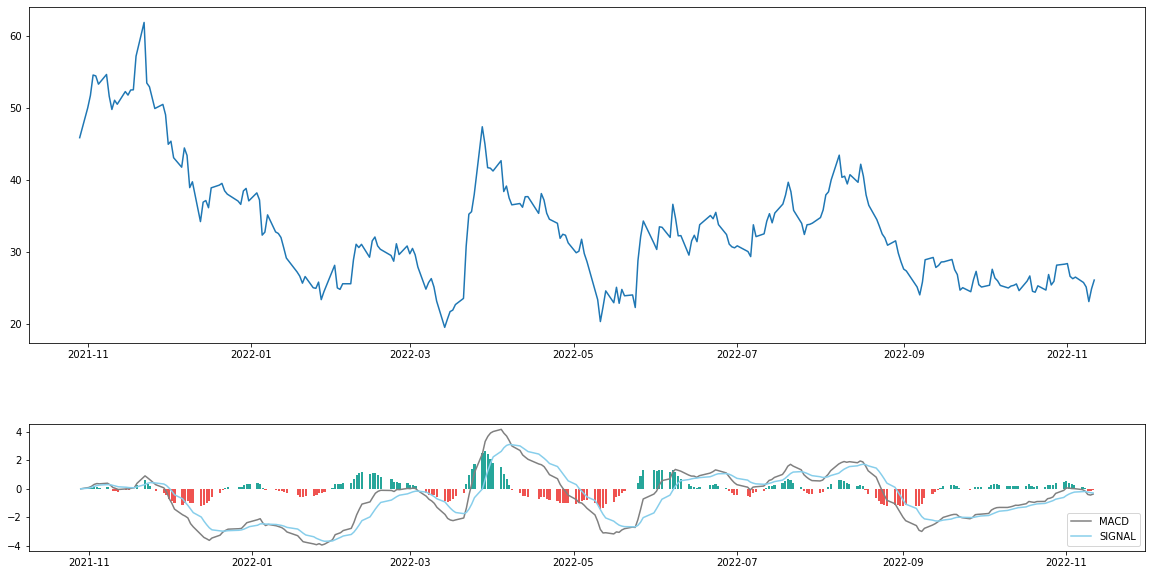

In [29]:
plot_macd(prices = ticker['adj close'], macd = macd, signal = macds, hist =  macdh)